In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
SDSS_DR16 = 'SDSS_DR16_90cutoff_for_Vicky.csv'
df = pd.read_csv(SDSS_DR16)

In [3]:
Types = df.loc[:, 'Types']
Types_ = np.array(Types)
types = Types.apply(lambda v: v.replace(
    'elliptical', '0').replace('spiral', '1')).astype(int)

X = np.array(df.loc[:, ['d4000_n', 'sigmaStars', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z']])
y = np.array(types)

rs = np.array(df.loc[:, 'z'])
fd = np.array(df.loc[:, 'fracDeV_r'])


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#randon_state ไว้กำหนดให้การ split ข้อมูลแต่ล่ะครั้ง ให้หน้าตาเหมือนเดิม ที่เป็น 42 เพราะว่ามีคนใช้แล้วใช้ตามกันเฉยๆ


In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(394005, 7)
(131335, 7)
(394005,)
(131335,)


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

C = 1000000000
gamma = 0.0001

# # RBF Kernel
# svm_rbf = SVC(kernel='rbf', C=C, gamma=gamma)

# svm_fit = svm_rbf.fit(X_train, y_train)
# svm_fit


In [7]:
import pickle

# # save train-test data
# svm_save = open('svm_7.csv', 'wb')
# pickle.dump(svm_fit, svm_save)
# svm_save.close()


In [8]:
# load data
svm_read = open('svm_7.csv', 'rb')
svm = pickle.load(svm_read)
svm


SVC(C=1000000000, gamma=0.0001)

In [9]:
# train_ = svm.score(X_train, y_train)
# test_ = svm.score(X_test, y_test)

# y_pred_ = svm.predict(X_test)

# y_score_ = svm.decision_function(X_test)

# svm_var = [train_, test_, y_pred_, y_score_]
# svm_var

In [10]:
# svm_save_var = open('svm_7_var.csv', 'wb')
# pickle.dump(svm_var, svm_save_var)
# svm_save_var.close()

In [11]:
svm_read_var = open('svm_7_var.csv', 'rb')
svm_result = pickle.load(svm_read_var)
svm_result

[0.8696615525183691,
 0.8685042067994061,
 array([0, 1, 0, ..., 0, 1, 1]),
 array([-7804.34965435, 13935.14006528, -2495.66555647, ...,
        -2314.25977186, 14223.75747015,  9660.09423795])]

In [12]:
# 0, 1, 2, 3
train = svm_result[0]
test = svm_result[1]
y_pred = svm_result[2]
y_score = svm_result[3]

train, test, y_pred, y_score

(0.8696615525183691,
 0.8685042067994061,
 array([0, 1, 0, ..., 0, 1, 1]),
 array([-7804.34965435, 13935.14006528, -2495.66555647, ...,
        -2314.25977186, 14223.75747015,  9660.09423795]))

In [13]:
print("Train set accuracy = " + str(train))
print("Test set accuracy = " + str(test))

Train set accuracy = 0.8696615525183691
Test set accuracy = 0.8685042067994061


In [14]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(53313, 8490, 8780, 60752)

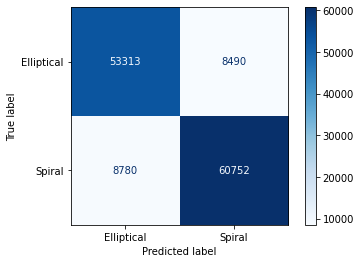

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

label_name = 'Elliptical', 'Spiral'

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='Blues', display_labels=label_name)
    
plt.show()

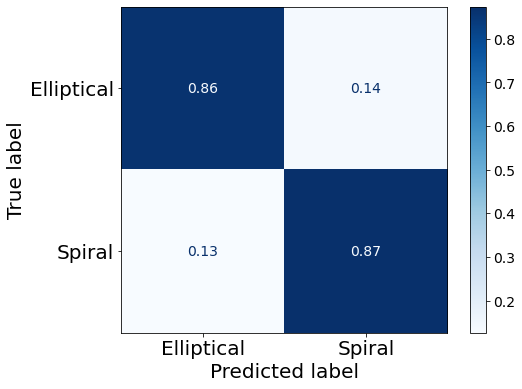

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='Blues', normalize='true', display_labels=label_name, ax=ax)


ax.set_xlabel('Predicted label', fontdict={'size':'20'})
ax.set_ylabel('True label', fontdict={'size':'20'})
ax.tick_params(axis='both', labelsize=20)
    
plt.show()

negative = elliptical

positive = spiral

In [17]:
X_test_tn = []
X_test_tp = []
X_test_fn = []
X_test_fp = []

for i in np.arange(0, len(y_test), 1):
    if y_test[i] == y_pred[i] == 0:
        # 0 = Elliptical = n
        X_test_tn += [X_test[i]]

    elif y_test[i] == y_pred[i] == 1:
        # 1 = Spiral = p
        X_test_tp += [X_test[i]]
        
    elif y_test[i] > y_pred[i]:
        # 1 > 0 = Spiral but pred Elliptical
        X_test_fn += [X_test[i]]
        
    elif y_test[i] < y_pred[i]:
        # 0 < 1 = Elliptical but pred Spiral
        X_test_fp += [X_test[i]]


In [18]:
# X = [(a1, b1, c1, d1, e1), (a2, b2, c2, d2, e2), (a3, b3, c3, d3, e3),...]
# *X = (a1, b1, c1, d1, e1) (a2, b2, c2, d2, e2) (a3, b3, c3, d3, e3)...
# zip(*X) = (a1, a2, a3,...), (b1, b2, b3,...), (c1, c2, c3,...), (d1, d2, d3,...), (e1, e2, e3,...) --> อ่านไม่ได้เลยต้องใส่ list

X_test_tn = list(zip(*X_test_tn))
X_test_tp = list(zip(*X_test_tp))
X_test_fn = list(zip(*X_test_fn))
X_test_fp = list(zip(*X_test_fp))

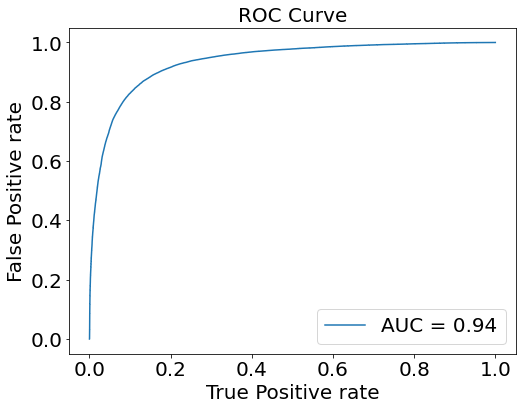

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

fig, ax = plt.subplots(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=svm.classes_[1])
roc_auc = metrics.auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax=ax)

plt.rcParams.update({'font.size': 20})
plt.xlabel('True Positive rate', fontdict={'size':'20'})
plt.ylabel('False Positive rate', fontdict={'size':'20'})
plt.tick_params(axis='both', labelsize=20)
plt.title('ROC Curve', size=20)

plt.show()

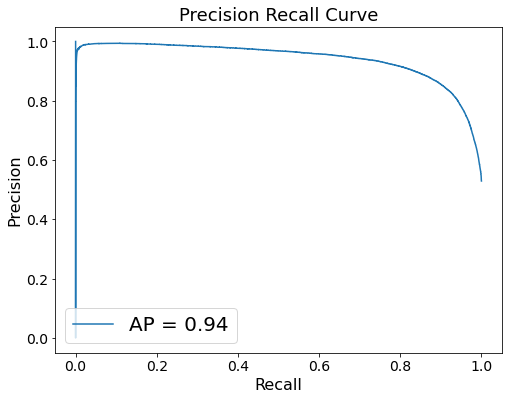

In [38]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score

fig, ax = plt.subplots(figsize=(8, 6))

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=svm.classes_[1])
ap = average_precision_score(y_test, y_score)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision=ap).plot(ax=ax)

plt.rcParams.update({'font.size': 14})
plt.tick_params(axis='both', labelsize=14)
plt.xlabel('Recall', fontdict={'size':'16'})
plt.ylabel('Precision', fontdict={'size':'16'})
plt.title('Precision Recall Curve', size=18)

plt.show()

In [21]:
from sklearn.inspection import permutation_importance

feature_names = ['d4000_n', '$\sigma*$', 'u', 'g', 'r', 'i', 'z']
features = np.array(feature_names)


In [22]:
# perm_importance = permutation_importance(svm, X_test, y_test)

In [23]:
# save_imp = open('svm_7_perm_imp.csv', 'wb')
# pickle.dump(perm_importance, save_imp)
# save_imp.close()

In [24]:
read_imp = open('svm_7_perm_imp.csv', 'rb')
perm_imp = pickle.load(read_imp)

Text(0.5, 1.0, 'Importance Score')

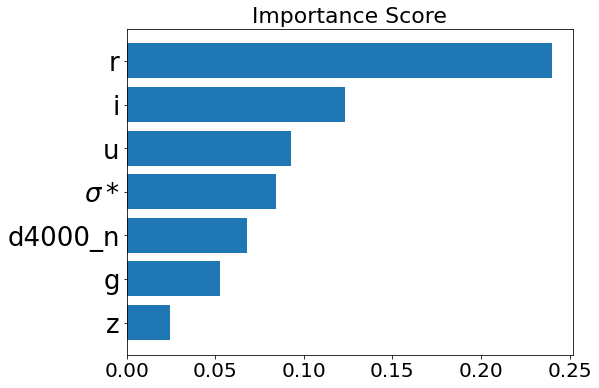

In [25]:
sorted_idx = perm_imp.importances_mean.argsort()

plt.figure(figsize=(8, 6), facecolor='none')

plt.barh(features[sorted_idx], perm_imp.importances_mean[sorted_idx])

plt.tick_params(axis='both', labelsize=20)
plt.tick_params(axis='y', labelsize=26)
plt.title("Importance Score", size=22)


In [26]:
def tn_tp_fn_fp(xlim, xticks, xlabel, pos):
    plt.figure(figsize=(8, 6), facecolor='none')
    plt.gca(xlim=xlim, xticks = xticks)

    step = 0.15
    bins = np.arange(np.min(X_test), np.max(X_test) + step, step)

    plt.hist(X_test_tp[pos], bins=bins, alpha=0.5, label='tp')
    plt.hist(X_test_tn[pos], bins=bins, alpha=0.5, label='tn')
    plt.hist(X_test_fp[pos], bins=bins, alpha=0.5, label='fp')
    plt.hist(X_test_fn[pos], bins=bins, alpha=0.5, label='fn')

    plt.xlabel(str(xlabel), size=16)
    plt.ylabel('Number', size=16)
    plt.legend(loc='upper right')

    plt.tick_params(which='major', direction='in', length=5, labelsize='12')

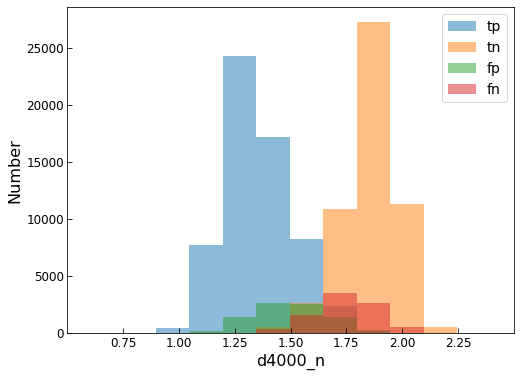

In [27]:
tn_tp_fn_fp([0.5, 2.5], np.arange(0.75, 2.5, 0.25), 'd4000_n', 0)

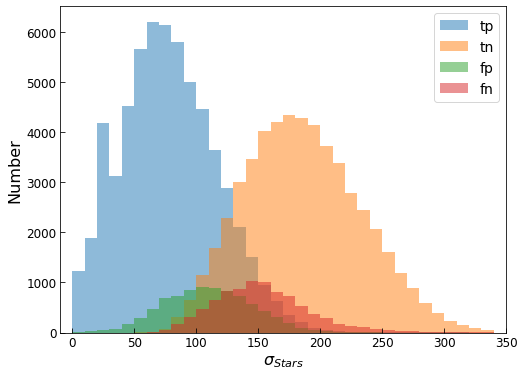

In [28]:
xlim = [-10, 350]
xticks = np.arange(0, 360, 50)
xlabel = '$\sigma_{Stars}$'
pos = 1

plt.figure(figsize=(8, 6), facecolor='none')
plt.gca(xlim=xlim, xticks = xticks)

# step = 0.05
# bins = np.arange(np.min(X_test), np.max(X_test) + step, step)
bins = np.arange(0, 350, 10)

plt.hist(X_test_tp[pos], bins=bins, alpha=0.5, label='tp')
plt.hist(X_test_tn[pos], bins=bins, alpha=0.5, label='tn')
plt.hist(X_test_fp[pos], bins=bins, alpha=0.5, label='fp')
plt.hist(X_test_fn[pos], bins=bins, alpha=0.5, label='fn')

plt.xlabel(str(xlabel), size=16)
plt.ylabel('Number', size=16)
plt.legend(loc='upper right')

plt.tick_params(which='major', direction='in', length=5, labelsize='12')

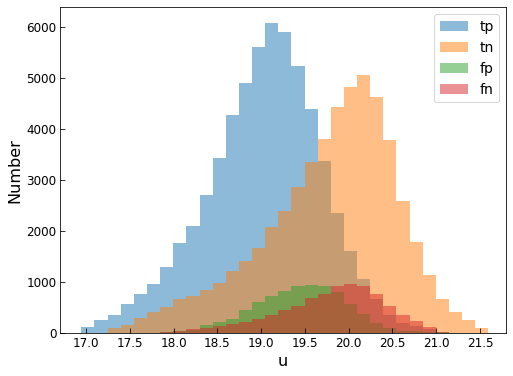

In [29]:
tn_tp_fn_fp([16.7, 21.8], np.arange(17, 22, 0.5), 'u', 2)

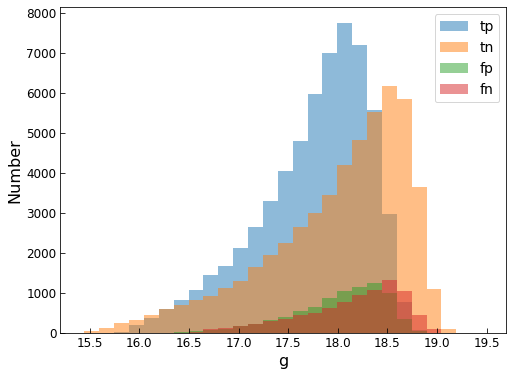

In [30]:
tn_tp_fn_fp([15.2, 19.7], np.arange(15.5, 20, 0.5), 'g', 3)

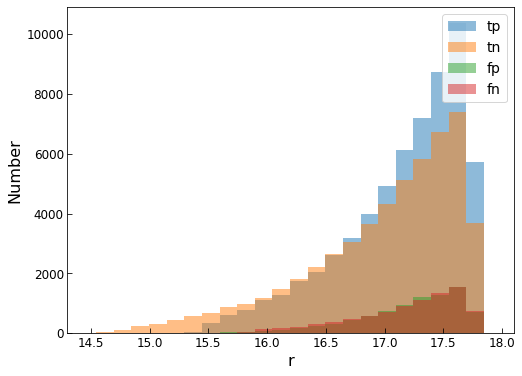

In [31]:
tn_tp_fn_fp([14.3, 18.1], np.arange(14.5, 18.5, 0.5), 'r', 4)

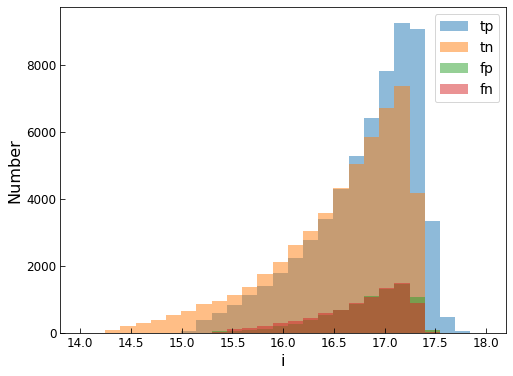

In [32]:
tn_tp_fn_fp([13.8, 18.2], np.arange(14, 18.5, 0.5), 'i', 5)

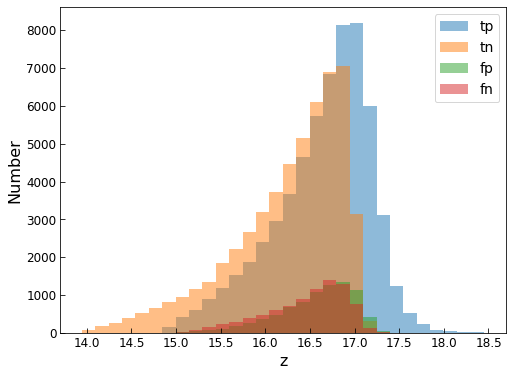

In [33]:
tn_tp_fn_fp([13.7, 18.7], np.arange(14, 19, 0.5), 'z', 6)